# Prise en main de l'API Pyspark

Il s'agit d'une courte introduction et d'un démarrage rapide de l'API DataFrame de PySpark. 

Il existe également d'autres informations utiles sur le site de documentation d'Apache Spark : [Spark SQL and DataFrames](https://spark.apache.org/docs/latest/sql-programming-guide.html), [RDD Programming Guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html), [Structured Streaming Programming Guide](https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html), [Spark Streaming Programming Guide](https://spark.apache.org/docs/latest/streaming-programming-guide.html) et [Machine Learning Library (MLlib) Guide](https://spark.apache.org/docs/latest/ml-guide.html).

Les applications PySpark commencent par initialiser `SparkSession` qui est le point d'entrée de PySpark comme ci-dessous. En cas d'exécution dans le shell PySpark via l'exécutable <code>pyspark</code>, le shell crée automatiquement la session dans la variable <code>spark</code> pour les utilisateurs.


## Prise en main de Spark

## Initialisation de la Spark Session

On instantie la SparkSession
Il va nous suivre tout au long de l'application
Les options de configurations sont infinies : elles peuvent toucher le contexte d'execution, 
le nombre de noeuds utilisés... 
Ici nous précisons le minimum : Le nom de l'application et le master, c'est à dire l'allocateur de ressources.
En disant local on va utiliser l'allocateur de ressources interne à Spark : Spark Standalone. 
Si vous lancez votre job Spark sur un cluster Hadoop, vous pouvez utiliser yarn

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [7]:
spark

Le spark context est le point d'entrée pour l'API de plus bas niveau les RDD.

In [2]:
sc = spark.sparkContext

In [8]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

# RDD (resilient distributed dataset)

On commence par créer un objet python standard :  intervalle d'entiers de 0 à 499

In [4]:
x = range(500)

Que savez faire avec un tel objet en python ?

In [36]:
for i in range(500):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Nous allons créer notre premier objet Spark ! 
La principale abstraction fournie par Spark est la RDD (resilient distributed dataset), c'est-à-dire une collection d'éléments répartis entre les nœuds du cluster et pouvant être exploités en parallèle.

In [9]:
range_rdd = sc.parallelize(range(500))

In [10]:
range_rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

In [11]:
for i in range_rdd:
    print(i)

TypeError: 'PipelinedRDD' object is not iterable

In [16]:
elem = range_rdd.take(5)

In [17]:
for i in elem:
    print(i)

0
1
2
3
4


In [13]:
range_rdd.getNumPartitions()

4

Revenir à un objet Python

In [14]:
range_rdd.collect()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Afficher le nombre de partition du RDD (le réduire à 2 puis le mettre à 4)

In [8]:
range_rdd.getNumPartitions()

4

In [20]:
new_rdd_2 = range_rdd.repartition(2)
new_rdd_2.getNumPartitions()

2

In [21]:
new_rdd_4 = new_rdd_2.repartition(4)
new_rdd_4.getNumPartitions()

4

In [23]:
new_rdd_2 = range_rdd.coalesce(2)
new_rdd_2.getNumPartitions()

2

In [24]:
new_rdd_4 = new_rdd_2.coalesce(4)
new_rdd_4.getNumPartitions()

2

Récupérer un échantillon de données (disons 100 données, prises au hasard)
Deux méthodes : une plus exacte mais exige que l'échantillon soit petit.
L'autre plus aléatoire mais supporte une très grande taille pour l'échantillon : essayer de comprendre pourquoi!

In [19]:
len(range_rdd.takeSample(True, 100))

100

In [25]:
range_rdd.sample(True, 0.2).count()

89

Ecrire votre RDD au format csv

In [26]:
range_rdd.saveAsTextFile("newTest2.csv")

Liser le fichier enregistré précédemment (avec spark.sparkContext.textFile ET avec spark.sparkContext.wholeTextFiles). Quelle est la différence entre ces deux primitives ?

In [27]:
rdd_read = sc.textFile("newTest2.csv")

In [28]:
rdd_read.getNumPartitions()

4

In [30]:
rdd_read.take(4)

['250', '251', '252', '253']

In [31]:
whole_rdd = spark.sparkContext.wholeTextFiles("newTest2.csv")

In [32]:
whole_rdd.getNumPartitions()

2

In [33]:
whole_rdd.take(4)

[('file:/Users/alexisgladilinebozio/Documents/Lectures/Simplon/lps-data-analyst-p2-public/module3/Spark/newTest2.csv/part-00002',
  '250\n251\n252\n253\n254\n255\n256\n257\n258\n259\n260\n261\n262\n263\n264\n265\n266\n267\n268\n269\n270\n271\n272\n273\n274\n275\n276\n277\n278\n279\n280\n281\n282\n283\n284\n285\n286\n287\n288\n289\n290\n291\n292\n293\n294\n295\n296\n297\n298\n299\n300\n301\n302\n303\n304\n305\n306\n307\n308\n309\n310\n311\n312\n313\n314\n315\n316\n317\n318\n319\n320\n321\n322\n323\n324\n325\n326\n327\n328\n329\n330\n331\n332\n333\n334\n335\n336\n337\n338\n339\n340\n341\n342\n343\n344\n345\n346\n347\n348\n349\n350\n351\n352\n353\n354\n355\n356\n357\n358\n359\n360\n361\n362\n363\n364\n365\n366\n367\n368\n369\n370\n371\n372\n373\n374\n'),
 ('file:/Users/alexisgladilinebozio/Documents/Lectures/Simplon/lps-data-analyst-p2-public/module3/Spark/newTest2.csv/part-00003',
  '375\n376\n377\n378\n379\n380\n381\n382\n383\n384\n385\n386\n387\n388\n389\n390\n391\n392\n393\n394\n395\n

Pour transformer une RDD, il faut utiliser l'API Spark. Cette collection de donnée est immutable et ne peut pas être modifiée comme un objet Python.

In [34]:
even_rdd = range_rdd.filter(lambda x: x % 2 == 0)

In [35]:
even_rdd.collect()

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

In [51]:
range_rdd.map(lambda x: x+1).collect()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [52]:
from datetime import datetime, date

In [53]:
rdd = sc.parallelize([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
])

In [69]:
rdd.saveAsTextFile("test")

Py4JJavaError: An error occurred while calling o614.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/Users/alexisgladilinebozio/Documents/Lectures/Simplon/lps-data-science/module5/notebook/test already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:298)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1090)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1088)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1061)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1026)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1008)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1007)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:964)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:962)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1578)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1578)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1564)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:551)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:550)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [65]:
rdd.map(lambda x: (x[0] + 1,x[1],x[2],x[3])).take(3)

[(2, 2.0, 'string1', datetime.date(2000, 1, 1)),
 (3, 3.0, 'string2', datetime.date(2000, 2, 1)),
 (4, 4.0, 'string3', datetime.date(2000, 3, 1))]

# DataFrame

Un DataFrame est l'API structurée la plus courante et représente simplement un tableau de données avec des lignes et des colonnes. La liste qui définit les colonnes et les types dans ces colonnes s'appelle le schéma. Vous pouvez considérer un DataFrame comme une feuille de calcul avec des colonnes nommées. Une feuille de calcul se trouve sur un ordinateur à un endroit spécifique, alors qu'un DataFrame Spark peut couvrir des milliers d'ordinateurs. La raison pour laquelle les données sont placées sur plus d'un ordinateur devrait être intuitive : soit les données sont trop volumineuses pour tenir sur une seule machine, soit il serait tout simplement trop long d'effectuer ce calcul sur une seule machine.

Un schéma définit les noms et les types de colonnes d'un DataFrame. Vous pouvez définir des schémas manuellement ou lire un schéma à partir d'une source de données (souvent appelé schéma en lecture). Les schémas se composent de types, ce qui signifie que vous avez besoin d'un moyen de spécifier ce qui se trouve où.


Nous allons voir les différentes manière de créer une DataFarame PySpark.
Les DataFrame peuvent être créés via `pyspark.sql.SparkSession.createDataFrame` en passant typiquement une liste de listes, tuples, dictionnaires et `pyspark.sql.Row`s, un [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) et un RDD consistant en une telle liste.
`pyspark.sql.SparkSession.createDataFrame` prend l'argument `schema` pour spécifier le schéma du DataFrame. Lorsqu'il est omis, PySpark infère le schéma correspondant en prenant un échantillon des données.

Tout d'abord, vous pouvez créer un DataFrame PySpark à partir d'une liste de Row

In [70]:
from datetime import datetime, date
from pyspark.sql import Row

Lorsque vous utilisez des DataFrames, vous profitez du format interne optimisé de Spark. Pour Spark (en Scala), les DataFrames sont simplement des ensembles de données de type Row. Le type "Row" est la représentation interne de Spark de son format optimisé en mémoire pour le calcul. Ce format permet un calcul hautement spécialisé et efficace car, plutôt que d'utiliser les types de la JVM, qui peuvent entraîner des coûts élevés de collecte de déchets et d'instanciation d'objets, Spark peut opérer sur son propre format interne sans encourir aucun de ces coûts.

In [71]:
df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



Créer une PySpark DataFrame avec un schéma explicite

In [67]:
df_2 = spark.createDataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], schema='a long, b double, c string, d date, e timestamp')
df_2

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [68]:
df_2.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



Créer une DataFrame à partir de pandas

In [72]:
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})

In [78]:
pandas_df['a'] = pandas_df['a'] + 1

In [79]:
pandas_df

a    b        c           d                   e
0  2  2.0  string1  2000-01-01 2000-01-01 12:00:00
1  3  3.0  string2  2000-02-01 2000-01-02 12:00:00
2  4  4.0  string3  2000-03-01 2000-01-03 12:00:00

In [90]:
df_3 = spark.createDataFrame(pandas_df)

[Row(a=2, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=3, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=4, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In [92]:
a = df_3.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  2|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  3|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [95]:
a = df_3.rdd.collect()

In [96]:
a

[Row(a=2, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=3, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=4, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

Créer une DataFrame à partir de RDD de liste de tuple.

In [74]:
list_tuple = [
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
]

In [7]:
rdd = spark.sparkContext.parallelize(list_tuple)

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [8]:
df_4 = spark.createDataFrame(rdd, schema=['a', 'b', 'c', 'd', 'e'])

In [10]:
df_4

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

Toutes ces DataFrames crées ont la même donnée et le même schéma.

In [98]:
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [76]:
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



## Afficher la donnée

Les premières lignes d'une DataFrame peuvent être affichées en lançant la commande `DataFrame.show()`.
On rappelle ici que Spark est paresseux, les lignes qui ne sont pas montrées ne sont pas évaluées.

In [19]:
df.select('b')

DataFrame[b: double]

In [ ]:
df.to

Vous pouvez parametrez une évaluation gourmande en modififiant la config `spark.sql.repl.eagerEval.enabled`. Le nombre de lignes peuvent être controllées par la config `spark.sql.repl.eagerEval.maxNumRows`.

In [17]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

On peut afficher la donnée verticalement

In [99]:
df.show(1, vertical=True)

-RECORD 0------------------
 a   | 1                   
 b   | 2.0                 
 c   | string1             
 d   | 2000-01-01          
 e   | 2000-01-01 12:00:00 
only showing top 1 row



Pour afficher le nom des colonnes de la DF

In [10]:
df.columns

['a', 'b', 'c', 'd', 'e']

In [11]:
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



Pour avoir les statistiques de la DF

In [12]:
df.select("a", "b", "c").describe().show()

+-------+---+---+-------+
|summary|  a|  b|      c|
+-------+---+---+-------+
|  count|  3|  3|      3|
|   mean|2.0|3.0|   null|
| stddev|1.0|1.0|   null|
|    min|  1|2.0|string1|
|    max|  3|4.0|string3|
+-------+---+---+-------+



`DataFrame.collect()` collecte les données distribuées du côté du driver comme des données locales en Python. Notez que cela peut provoquer une out-of-memory error lorsque l'ensemble de données est trop grand pour tenir dans le côté driver, car il collecte toutes les données des executors vers le côté driver.

In [13]:
df.collect()

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=3, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

Pour éviter les "out-of-memory exception", on utilise `DataFrame.take()` ou `DataFrame.tail()`.

In [14]:
df.take(1)

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0))]

On peut également convertir la DataFrame Spark en DataFrame Pandas. Attention aux capacités de votre driver !

In [15]:
df.toPandas()

a    b        c           d                   e
0  1  2.0  string1  2000-01-01 2000-01-01 12:00:00
1  2  3.0  string2  2000-02-01 2000-01-02 12:00:00
2  3  4.0  string3  2000-03-01 2000-01-03 12:00:00

## Selectionner et Accéder à la Donnée 

PySpark DataFrame est "lazily evaluated" and choisir une colonne ne déclenche pas le calcul mais retourne simplement une instance de `Column`.
Pour accéder à la donnée, on ne peut pas utiliser simplement une fonction python ou pandas.

In [16]:
df.a

Column<b'a'>

C'est le cas de la plupart des opérations qui portent sur les colonnes.

In [98]:
from pyspark.sql import Column
from pyspark.sql.functions import upper

type(df.c) == type(upper(df.c)) == type(df.c.isNull())

True

Ces `Column` peuvent être utilsées pour sélectionner une colonne dans la DF.

In [95]:
df = df.select(df.c).show()

+-------+
|      c|
+-------+
|string1|
|string2|
|string3|
+-------+



On peut créer une nouvelle `Column`.

In [99]:
a = df.withColumn('upper_c', upper(df.c))

In [101]:
a.show()

+---+---+-------+----------+-------------------+-------+
|  a|  b|      c|         d|                  e|upper_c|
+---+---+-------+----------+-------------------+-------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|STRING1|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|STRING2|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|STRING3|
+---+---+-------+----------+-------------------+-------+



In [90]:
df_2 = df.withColumn('upper_c', upper(df.c))

In [91]:
df_2.show()

+---+---+-------+----------+-------------------+-------+
|  a|  b|      c|         d|                  e|upper_c|
+---+---+-------+----------+-------------------+-------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|STRING1|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|STRING2|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|STRING3|
+---+---+-------+----------+-------------------+-------+



Pour sélectionner un sous ensemble de lignes, on utilise `DataFrame.filter()`.

In [20]:
df.filter(df.a == 1).show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+



## Appliquer une fonction Function Python


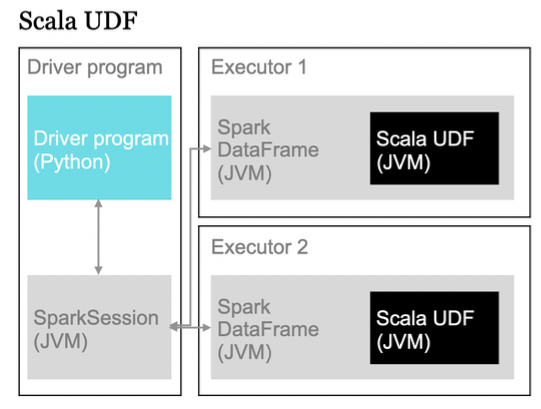

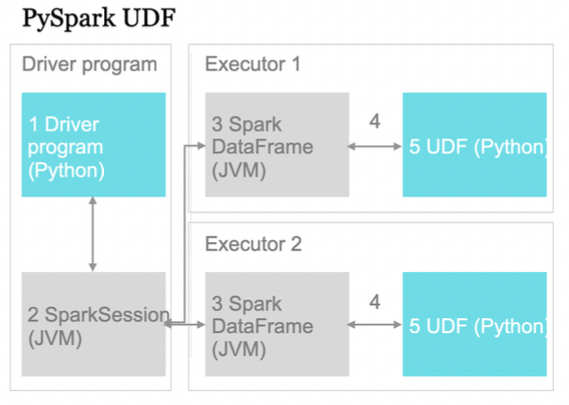

In [21]:
import pandas
from pyspark.sql.functions import pandas_udf

@pandas_udf('long')
def pandas_plus_one(series: pd.Series) -> pd.Series:
    # Simply plus one by using pandas Series.
    return series + 1

df.select(pandas_plus_one(df.a)).show()

+------------------+
|pandas_plus_one(a)|
+------------------+
|                 2|
|                 3|
|                 4|
+------------------+



## Grouper la donnée

In [23]:
df = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])
df.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



Faire une moyenne

In [24]:
df.groupby('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
|black|    6.0|   60.0|
| blue|    3.0|   30.0|
+-----+-------+-------+



Appliquer une fonction native pandas

In [25]:
def plus_mean(pandas_df):
    return pandas_df.assign(v1=pandas_df.v1 - pandas_df.v1.mean())

df.groupby('color').applyInPandas(plus_mean, schema=df.schema).show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana| -3| 10|
|  red|carrot| -1| 30|
|  red|carrot|  0| 50|
|  red|banana|  2| 70|
|  red| grape|  3| 80|
|black|carrot|  0| 60|
| blue|banana| -1| 20|
| blue| grape|  1| 40|
+-----+------+---+---+



Grouper et appliquer une fonction

In [26]:
df1 = spark.createDataFrame(
    [(20000101, 1, 1.0), (20000101, 2, 2.0), (20000102, 1, 3.0), (20000102, 2, 4.0)],
    ('time', 'id', 'v1'))

df2 = spark.createDataFrame(
    [(20000101, 1, 'x'), (20000101, 2, 'y')],
    ('time', 'id', 'v2'))

def asof_join(l, r):
    return pd.merge_asof(l, r, on='time', by='id')

df1.groupby('id').cogroup(df2.groupby('id')).applyInPandas(
    asof_join, schema='time int, id int, v1 double, v2 string').show()

+--------+---+---+---+
|    time| id| v1| v2|
+--------+---+---+---+
|20000101|  1|1.0|  x|
|20000102|  1|3.0|  x|
|20000101|  2|2.0|  y|
|20000102|  2|4.0|  y|
+--------+---+---+---+



### CSV

In [27]:
df.write.csv('foo.csv', header=True)
spark.read.csv('foo.csv', header=True).show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



### Parquet

In [28]:
df.write.parquet('bar.parquet')
spark.read.parquet('bar.parquet').show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



### ORC

In [29]:
df.write.orc('zoo.orc')
spark.read.orc('zoo.orc').show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



## Travailler avec SQL

Les DataFrame et Spark SQL partagent le même moteur d'exécution, ils peuvent être utilisés de manière interchangeable. Par exemple, vous pouvez enregistrer le DataFrame comme une table et exécuter un SQL facilement comme ci-dessous :

In [30]:
df.createOrReplaceTempView("tableA")
spark.sql("SELECT count(*) from tableA").show()

+--------+
|count(1)|
+--------+
|       8|
+--------+



Les expressions SQL peuvent direcement être utilisées comme des colonnes PySpark.

In [32]:
from pyspark.sql.functions import expr

df.selectExpr('add_one(v1)').show()
df.select(expr('count(*)') > 0).show()

+-----------+
|add_one(v1)|
+-----------+
|          2|
|          3|
|          4|
|          5|
|          6|
|          7|
|          8|
|          9|
+-----------+

+--------------+
|(count(1) > 0)|
+--------------+
|          true|
+--------------+

